In [2]:
import pandas as pd

# Ruta al archivo CSV (ajusta esta ruta si es diferente)
csv_file = './Data/limpio.csv'  # Ruta relativa desde donde estás ejecutando el script

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv(csv_file)

# Mostrar las primeras filas del DataFrame para verificar que se cargó correctamente
df.head()

,ID,Genero,Casado,Edad,Graduado,Profesion,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Provincia,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno,Comunidad
0,CLI10,0,0.833063,1.035176,2,0.268026,-0.775758,-0.151048,0.152186,-1.034957,1,1.052800,Segovia,-0.099417,1.210732,1.534894,-0.692072,NaN,-0.541836
1,CLI100,1,0.833063,0.872409,2,0.623398,-0.775758,1.465015,-0.493738,-0.872187,1,1.231385,Alicante,-0.255354,0.164441,1.534894,0.416520,1.132443,0.319047
2,CLI1000,1,0.833063,0.926665,2,-1.153465,-0.775758,1.465015,0.152186,-0.926444,1,-0.545951,Toledo,0.056052,-0.533086,-0.651511,0.732300,-0.476229,-0.326615
3,CLI10000,1,-1.050611,-0.809517,1,-0.087347,0.470020,-0.151048,0.798110,0.809766,3,-0.888343,Leon,0.004073,-0.533086,-0.651511,1.652767,0.328107,-0.541836
4,CLI10001,1,0.833063,0.221341,1,1.334144,-0.775758,1.465015,-0.493738,-0.221108,1,-0.741176,LLeida,-0.117680,-0.533086,1.534894,-0.860041,NaN,-0.111395


In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from sklearn.decomposition import PCA

# Definir las columnas numéricas que vamos a usar para el PCA
numeric_cols = ['Edad', 'Ingresos_anuales_brutos', 'anno_nacimiento', 'Generacion', 'Family_Size', 
                'Gasto_medio_mensual_cuota', 'Dias_cliente', 'Comunidad']

# Extraer las columnas seleccionadas
X = df[numeric_cols]

# Inicializar el PCA con la varianza explicada del 95%
pca_model = PCA(0.95)

# Ajustar el PCA a los datos y reducir la dimensionalidad
X_reducido = pca_model.fit_transform(X)

# Imprimir el número de componentes seleccionados para explicar al menos el 95% de la varianza
print(f"Se seleccionaron {pca_model.n_components_} componentes para explicar el 95% de la varianza.")

# Mostrar la varianza explicada por cada componente principal
print(f"Varianza explicada por cada componente: {pca_model.explained_variance_ratio_}")

# Mostrar la varianza acumulada
print(f"Varianza acumulada: {pca_model.explained_variance_ratio_.cumsum()}")


Se seleccionaron 6 componentes para explicar el 95% de la varianza.
Varianza explicada por cada componente: [0.43214534 0.12814005 0.12351781 0.12275584 0.11275514 0.04469078]
Varianza acumulada: [0.43214534 0.5602854  0.68380321 0.80655905 0.91931419 0.96400497]


#### A. Explorar la varianza explicada por los componentes

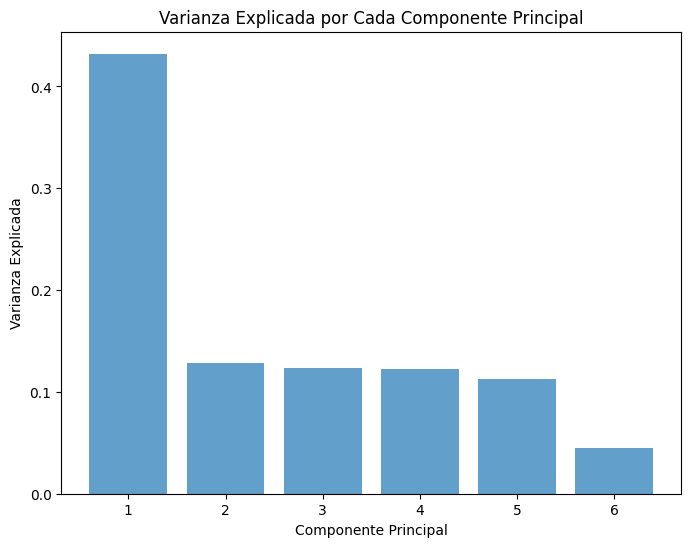

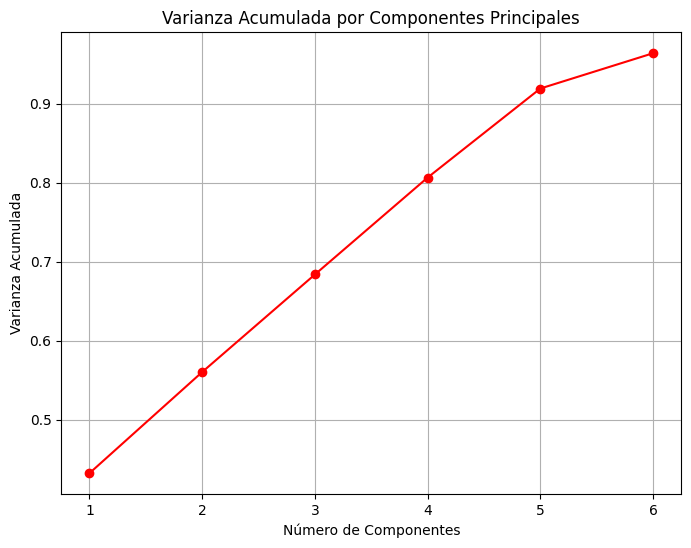

In [5]:
import matplotlib.pyplot as plt

# Graficar la varianza explicada por cada componente
plt.figure(figsize=(8, 6))
plt.bar(range(1, pca_model.n_components_ + 1), pca_model.explained_variance_ratio_, alpha=0.7, align='center')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Cada Componente Principal')
plt.show()

# Graficar la varianza acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, pca_model.n_components_ + 1), pca_model.explained_variance_ratio_.cumsum(), marker='o', color='r')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Acumulada por Componentes Principales')
plt.grid()
plt.show()


#### B. Visualización de los Datos Reducidos en 2D o 3D

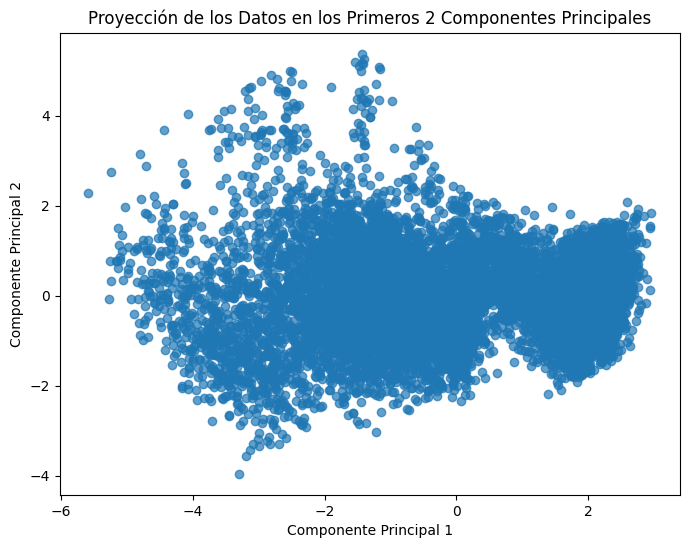

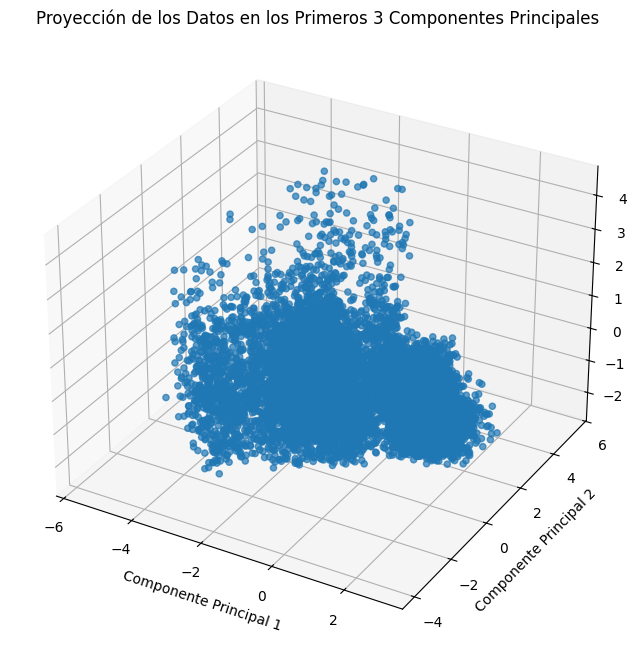

In [6]:
# Si reducimos a dos componentes, podemos graficar los resultados
if pca_model.n_components_ >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_reducido[:, 0], X_reducido[:, 1], alpha=0.7)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('Proyección de los Datos en los Primeros 2 Componentes Principales')
    plt.show()

# Si reducimos a tres componentes, podemos hacer una gráfica 3D
if pca_model.n_components_ >= 3:
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_reducido[:, 0], X_reducido[:, 1], X_reducido[:, 2], alpha=0.7)
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')
    ax.set_title('Proyección de los Datos en los Primeros 3 Componentes Principales')
    plt.show()


#### C. Comprobar los Cargados de los Componentes Principales

Cargados de los componentes principales:
[[-0.49777465 -0.39153918  0.49793842  0.47438791  0.18066408 -0.3053311
  -0.00735643  0.0031931 ]
 [-0.21042498  0.38689619  0.21031246  0.16438733  0.19705209  0.54595449
   0.48870916 -0.3988053 ]
 [-0.1311458   0.20957664  0.13080495  0.14152325 -0.09793021  0.32791831
   0.06760626  0.88320343]
 [ 0.10208184 -0.20869731 -0.10150628 -0.05006396 -0.28990895 -0.33298677
   0.85163604  0.11403274]
 [ 0.1150823  -0.06754094 -0.11476624 -0.23428629  0.90650348 -0.11774155
   0.1755028   0.21844923]
 [-0.04073668  0.77527259  0.04079992  0.15042088  0.02926391 -0.60956608
  -0.02128142  0.01103494]]


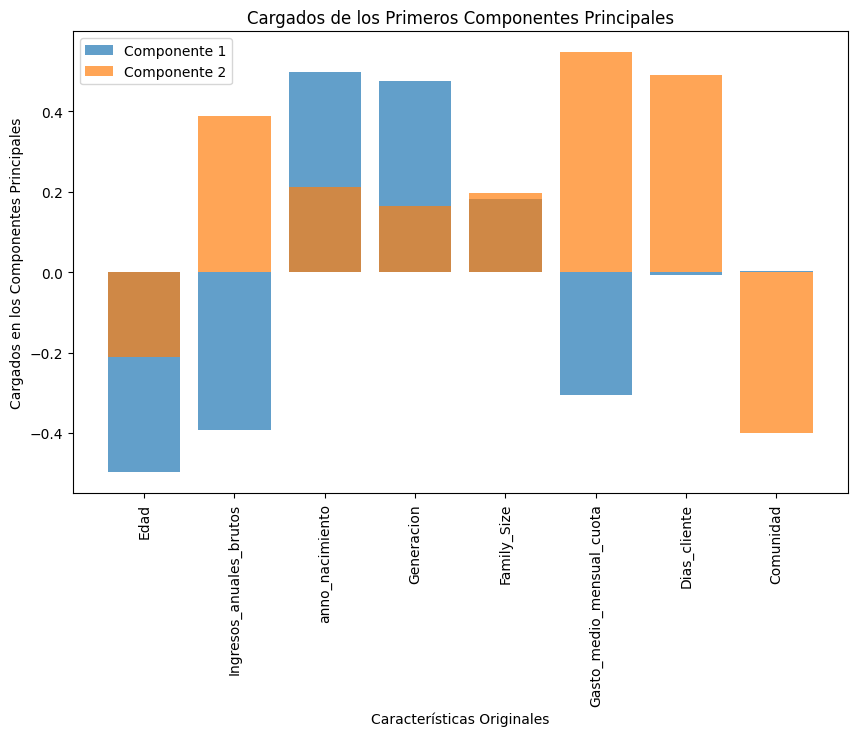

In [7]:
# Ver los cargados de cada componente principal (los coeficientes de las variables originales en cada componente)
componentes = pca_model.components_
print(f"Cargados de los componentes principales:\n{componentes}")

# Visualizar los cargados de los componentes principales
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(numeric_cols) + 1), componentes[0], alpha=0.7, label="Componente 1")
plt.bar(range(1, len(numeric_cols) + 1), componentes[1], alpha=0.7, label="Componente 2")
plt.xticks(range(1, len(numeric_cols) + 1), numeric_cols, rotation=90)
plt.xlabel('Características Originales')
plt.ylabel('Cargados en los Componentes Principales')
plt.legend(loc='best')
plt.title('Cargados de los Primeros Componentes Principales')
plt.show()


#### 1. Realización de K-means clustering:

c:\Users\aserr\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\aserr\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\aserr\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\aserr\AppData\Local\Programs\Python\Python313\Lib\subprocess.py

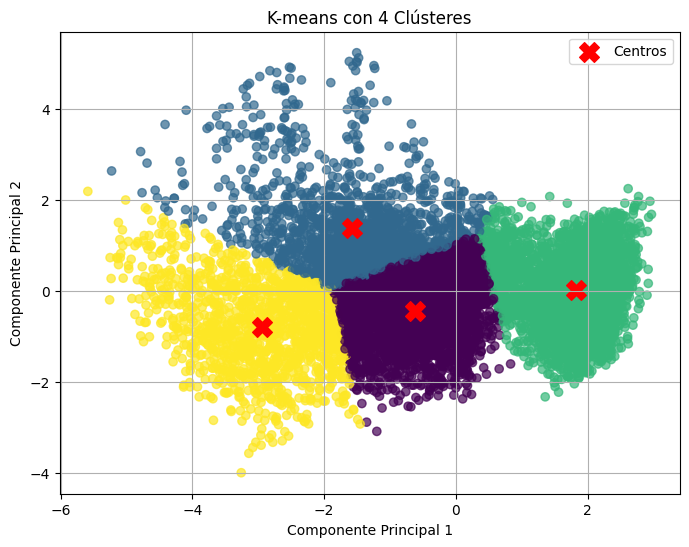

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Escalar los datos ---
escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)  # Asegúrate de que X esté definido (tus datos)

# --- 2. Reducir dimensiones con PCA (2D para visualización) ---
pca_model = PCA(n_components=2)
X_reducido = pca_model.fit_transform(X_escalado)

# --- 3. Aplicar K-means con k = 4 ---
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
etiquetas = kmeans.fit_predict(X_reducido)
centros = kmeans.cluster_centers_

# --- 4. Agregar etiquetas de clúster al DataFrame ---
df['Cluster'] = etiquetas  # Asegúrate de que df esté definido

# --- 5. Visualización ---
plt.figure(figsize=(8, 6))
plt.scatter(X_reducido[:, 0], X_reducido[:, 1], c=etiquetas, cmap='viridis', alpha=0.7)
plt.scatter(centros[:, 0], centros[:, 1], s=200, c='red', marker='X', label='Centros')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title(f'K-means con {k} Clústeres')
plt.legend()
plt.grid(True)
plt.show()


#### 2. Determinación del número óptimo de clústeres (método del codo):


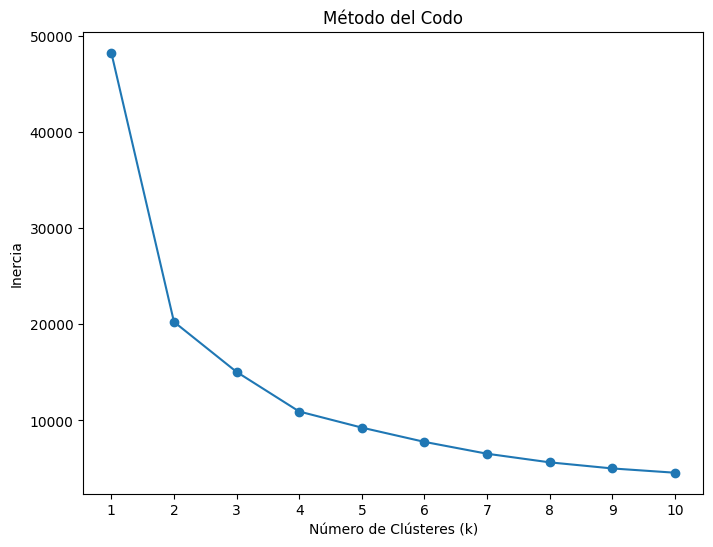

In [9]:
# Método del codo para determinar el número óptimo de clústeres
inercia = []
rangos_k = range(1, 11)  # Probar con diferentes valores de k (1 a 10)

for k in rangos_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reducido)
    inercia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(rangos_k, inercia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.xticks(rangos_k)
plt.show()


#### 3. Realizar un Clustering Jerárquico (Agglomerative Clustering):


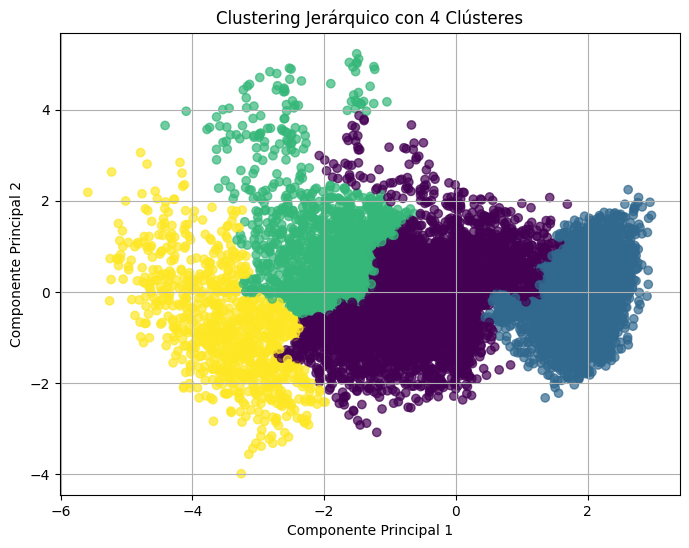

In [10]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar Agglomerative Clustering con 4 clústeres
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_clustering.fit_predict(X_reducido)

# Agregar las etiquetas de los clústeres jerárquicos al DataFrame
df['Agg_Cluster'] = agg_labels

# Visualizar los clústeres jerárquicos si hay al menos 2 componentes
if pca_model.n_components_ >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_reducido[:, 0], X_reducido[:, 1], c=agg_labels, cmap='viridis', alpha=0.7)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('Clustering Jerárquico con 4 Clústeres')
    plt.grid(True)
    plt.show()


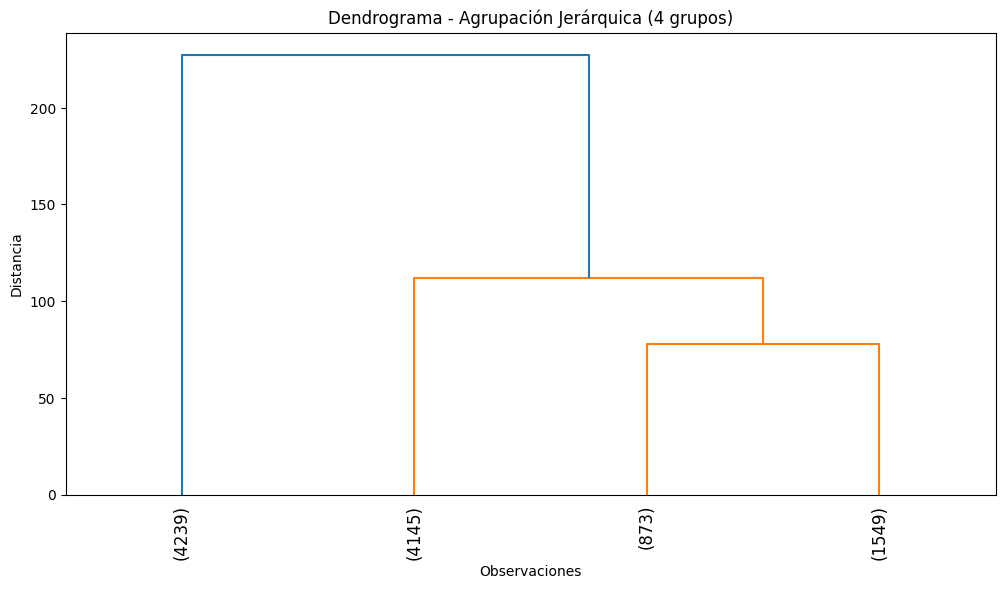

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcular el linkage jerárquico
linked = linkage(X_reducido, method='ward')  # método 'ward' es bueno para distancias euclidianas

# Plot del dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linked,
           truncate_mode='lastp',  # solo los últimos niveles
           p=4,                    # mostrar agrupación en 4 clústeres
           leaf_rotation=90.,
           leaf_font_size=12.)
plt.title('Dendrograma - Agrupación Jerárquica (4 grupos)')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
plt.show()


### Análisis k-means


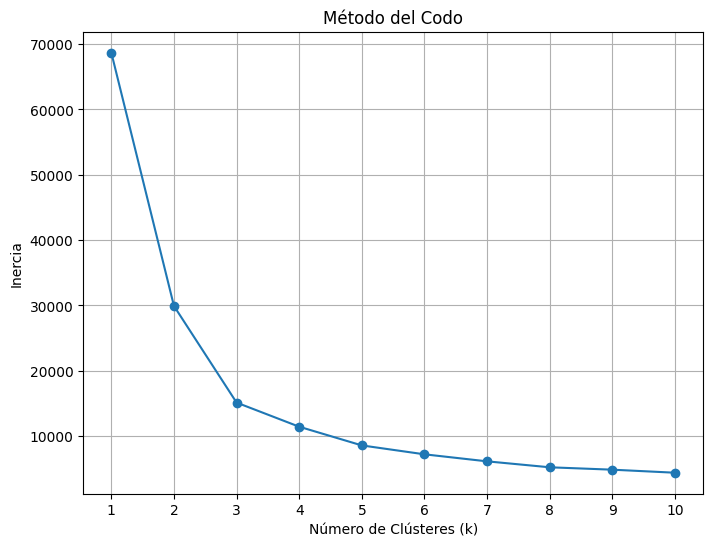


Estadísticas descriptivas por clúster:
           Genero    Casado      Edad  Graduado  Profesion  \
Cluster                                                      
0        0.509024  0.285074 -0.000379  1.840624  -0.490334   
1        0.533585 -0.750171 -0.950296  1.363019   0.112288   
2        0.581374  0.657639  1.862109  1.481013   1.089303   
3        0.600977  0.538547  0.699988  1.737378  -0.019629   

         Experiencia_laboral  Gastoscore  Family_Size  anno_nacimiento  \
Cluster                                                                  
0                  -0.544438    0.487665    -0.140051         0.000084   
1                   1.136316   -0.127468     0.347669         0.950711   
2                  -0.775758   -0.907938    -0.520019        -1.862737   
3                  -0.765106   -0.033923    -0.142109        -0.699984   

         Generacion  Ingresos_anuales_brutos  Digital_encuesta  \
Cluster                                                          
0         

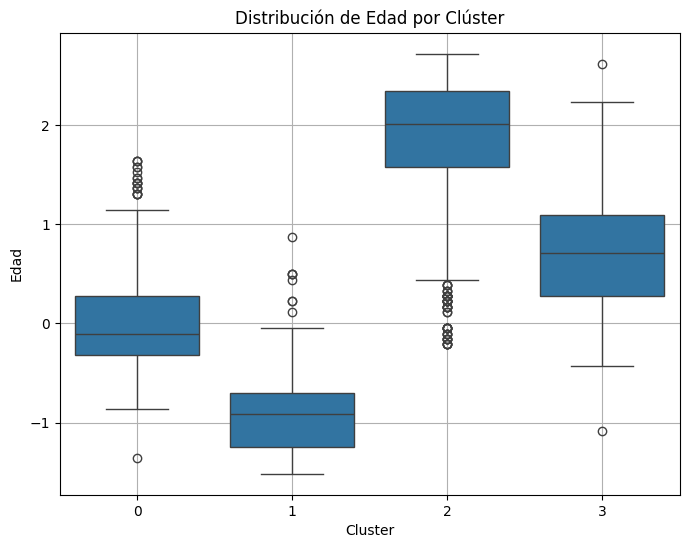

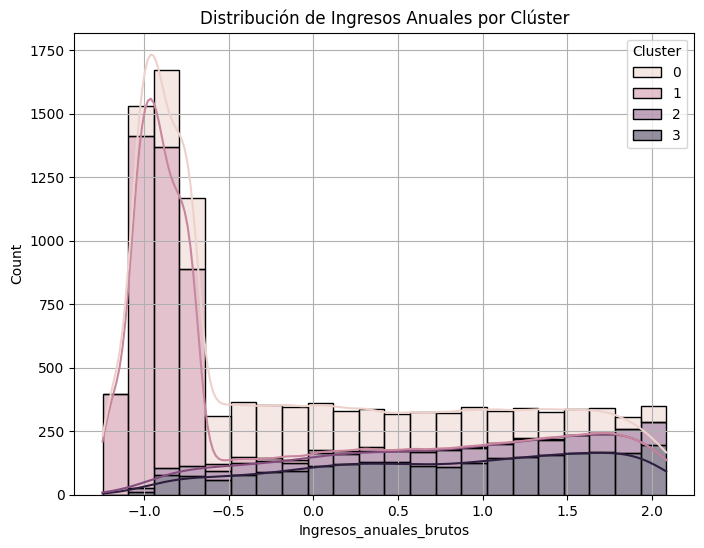


Centros de los clústeres en el espacio PCA:
[[-0.2850359  -1.30575952]
 [ 2.37565725  0.54994381]
 [-3.58560061  2.16543098]
 [-1.84170019 -0.12551857]]


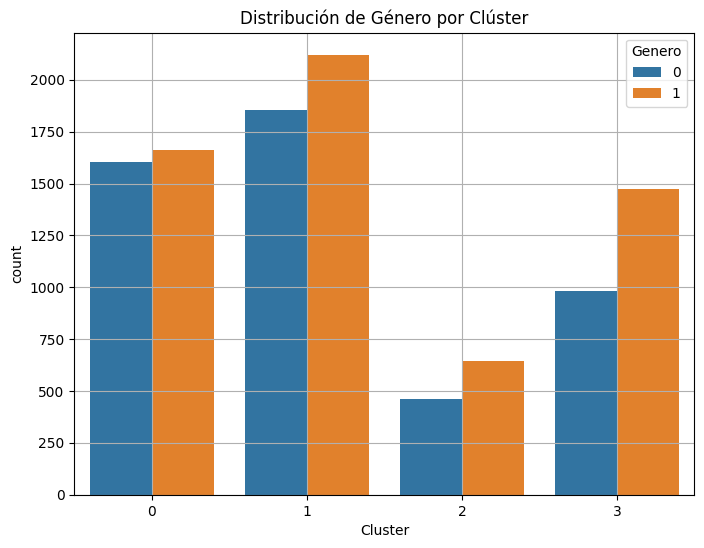


Tamaño de cada clúster:
Cluster
0    3269
1    3975
2    1106
3    2456
Name: count, dtype: int64


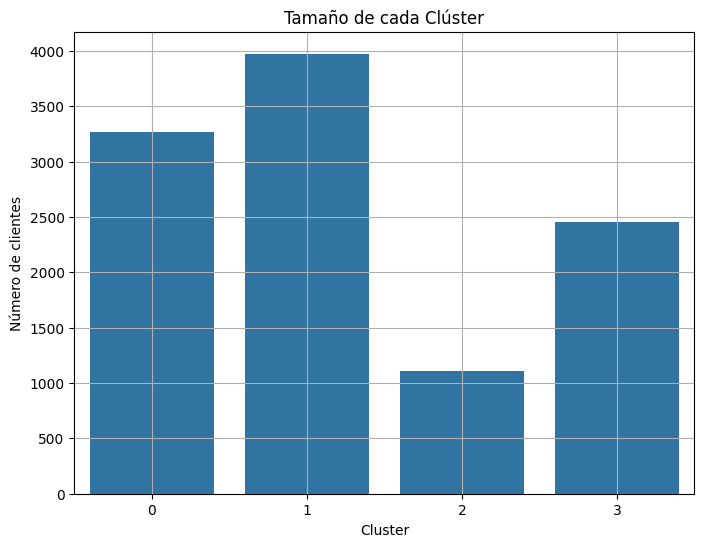

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Cargar los datos (ajusta esto según cómo cargues tu dataset)
# df = pd.read_csv('tu_archivo.csv')  # Descomenta si necesitas cargar datos

## Preprocesamiento ##
# Eliminar columnas no numéricas para el clustering (conservando solo las numéricas)
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
df_numerico = df[columnas_numericas]

# Imputación de valores NaN con la media de cada columna
imputer = SimpleImputer(strategy='mean')
df_numerico = pd.DataFrame(imputer.fit_transform(df_numerico), columns=df_numerico.columns)

# Estandarizar los datos
scaler = StandardScaler()
X_estandarizado = scaler.fit_transform(df_numerico)

## Reducción de dimensionalidad con PCA ##
pca = PCA(n_components=2)  # Reducimos a 2 componentes para visualización
X_reducido = pca.fit_transform(X_estandarizado)

## Método del Codo para determinar el número óptimo de clusters ##
inercia = []
rangos_k = range(1, 11)  # Probamos de 1 a 10 clusters

for k in rangos_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reducido)
    inercia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(rangos_k, inercia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.xticks(rangos_k)
plt.grid(True)
plt.show()

## Aplicar K-Means con el número óptimo de clusters (ajusta k según tu análisis) ##
k = 4  # Ahora con 4 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
etiquetas = kmeans.fit_predict(X_reducido)
centros = kmeans.cluster_centers_

# Añadir las etiquetas de cluster al dataframe original
df['Cluster'] = etiquetas

## Análisis y visualización de resultados ##

# --- Estadísticas descriptivas por clúster (solo columnas numéricas) ---
cluster_stats = df.groupby('Cluster').mean(numeric_only=True)
print("\nEstadísticas descriptivas por clúster:")
print(cluster_stats)

# --- Boxplot de 'Edad' por 'Cluster' ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Edad', data=df)
plt.title('Distribución de Edad por Clúster')
plt.grid(True)
plt.show()

# --- Histograma de 'Ingresos Anuales' por 'Cluster' ---
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Ingresos_anuales_brutos', hue='Cluster', multiple='stack', kde=True)
plt.title('Distribución de Ingresos Anuales por Clúster')
plt.grid(True)
plt.show()

# --- Mostrar los centros de los clústeres ---
print(f"\nCentros de los clústeres en el espacio PCA:")
print(centros)


# --- Análisis adicional: Distribución de variables categóricas por cluster ---
if 'Genero' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='Cluster', hue='Genero')
    plt.title('Distribución de Género por Clúster')
    plt.grid(True)
    plt.show()

# --- Tamaño de cada clúster ---
tamanio_clusters = df['Cluster'].value_counts().sort_index()
print("\nTamaño de cada clúster:")
print(tamanio_clusters)

# Gráfico de tamaño de clusters
plt.figure(figsize=(8, 6))
sns.barplot(x=tamanio_clusters.index, y=tamanio_clusters.values)
plt.title('Tamaño de cada Clúster')
plt.xlabel('Cluster')
plt.ylabel('Número de clientes')
plt.grid(True)
plt.show()


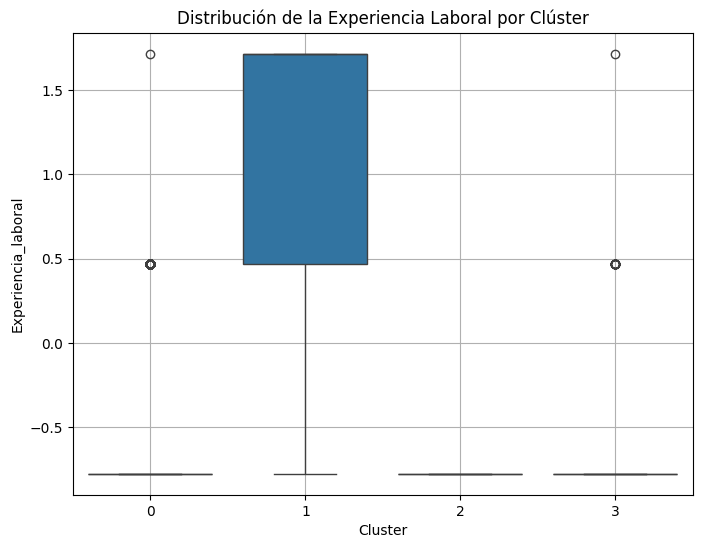

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Experiencia_laboral', data=df)
plt.title('Distribución de la Experiencia Laboral por Clúster')
plt.grid(True)
plt.show()


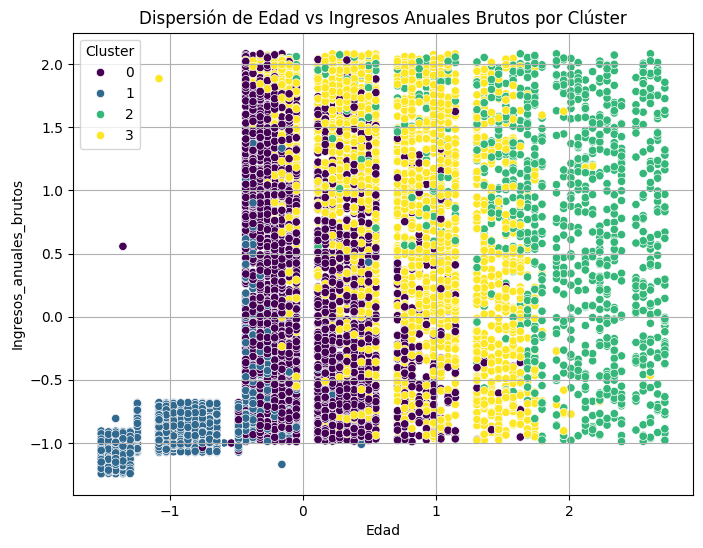

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Edad', y='Ingresos_anuales_brutos', hue='Cluster', palette='viridis')
plt.title('Dispersión de Edad vs Ingresos Anuales Brutos por Clúster')
plt.grid(True)
plt.show()


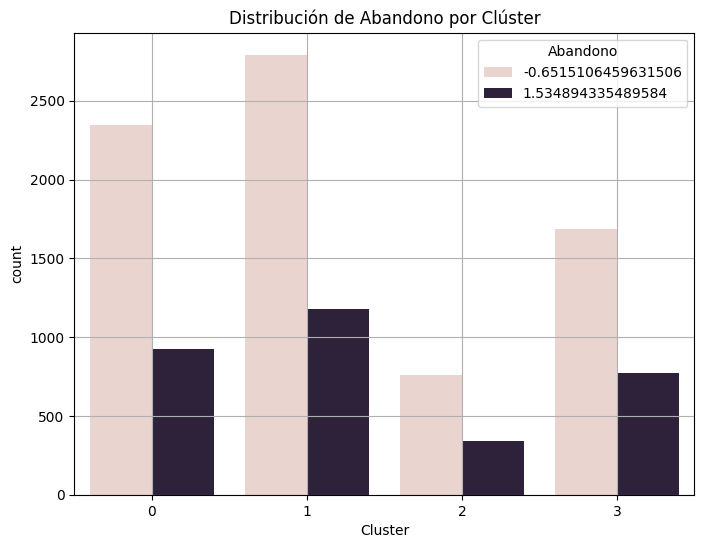

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', hue='Abandono', data=df)
plt.title('Distribución de Abandono por Clúster')
plt.grid(True)
plt.show()
